In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [ ]:
df = pd.read_csv('sales_dataset.csv')
df.head()

,Month,Sales
0,1984-01,2815
1,1984-02,2672
2,1984-03,2755
3,1984-04,2721
4,1984-05,2946


In [ ]:
df['Month']= pd.to_datetime(df['Month'])
df.head()

,Month,Sales
0,1984-01-01,2815
1,1984-02-01,2672
2,1984-03-01,2755
3,1984-04-01,2721
4,1984-05-01,2946


In [ ]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


In [ ]:
threshold = np.mean(df.Sales) + 2.19*np.std(df.Sales)
flag = [1 if sales > threshold else 0 for sales in df.Sales]
sum(flag)

6

In [ ]:
print(flag)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
flag = pd.Series(flag)
df_new = pd.concat([df, flag],axis=1)
df_new.rename(columns={0:'flag'}, inplace=True)
df_flag = df_new[df_new.flag == 1]
df_flag

,Month,Sales,flag
47,1987-12-01,10651,1
59,1988-12-01,11331,1
70,1989-11-01,10803,1
71,1989-12-01,13916,1
83,1990-12-01,13076,1
95,1991-12-01,12670,1


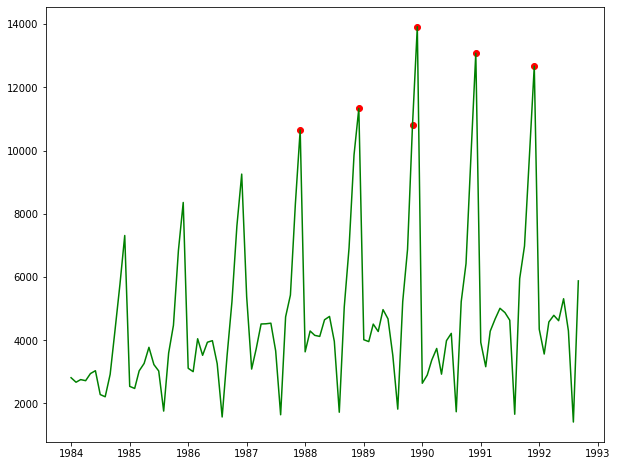

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(df_new.Month, df_new.Sales, color='g')
plt.scatter(df_flag.Month, df_flag.Sales, color='r')
plt.show()

In [ ]:
df.iloc[12:24]

,Month,Sales
12,1985-01-01,2541
13,1985-02-01,2475
14,1985-03-01,3031
15,1985-04-01,3266
16,1985-05-01,3776
17,1985-06-01,3230
18,1985-07-01,3028
19,1985-08-01,1759
20,1985-09-01,3595
21,1985-10-01,4474


In [ ]:
eighty_four = df.iloc[0:12]
eighty_five = df.iloc[12:24]
eighty_six  = df.iloc[24:36]
eighty_seven= df.iloc[36:48]
eighty_eight= df.iloc[48:60]
eighty_nine = df.iloc[60:72]
ninety      = df.iloc[72:84]
ninety_one  = df.iloc[84:96]
ninety_two  = df.iloc[96:105]

In [ ]:
eighty_four

,Month,Sales
0,1984-01-01,2815
1,1984-02-01,2672
2,1984-03-01,2755
3,1984-04-01,2721
4,1984-05-01,2946
5,1984-06-01,3036
6,1984-07-01,2282
7,1984-08-01,2212
8,1984-09-01,2922
9,1984-10-01,4301


In [ ]:
eighty_five

,Month,Sales
12,1985-01-01,2541
13,1985-02-01,2475
14,1985-03-01,3031
15,1985-04-01,3266
16,1985-05-01,3776
17,1985-06-01,3230
18,1985-07-01,3028
19,1985-08-01,1759
20,1985-09-01,3595
21,1985-10-01,4474


In [ ]:
ninety_two

,Month,Sales
96,1992-01-01,4348
97,1992-02-01,3564
98,1992-03-01,4577
99,1992-04-01,4788
100,1992-05-01,4618
101,1992-06-01,5312
102,1992-07-01,4298
103,1992-08-01,1413
104,1992-09-01,5877


In [ ]:
def detect_peak(df):
  df.reset_index(drop=True, inplace=True)
  threshold = np.mean(df.Sales) + 2.19*np.std(df.Sales)
  flag = [1 if sales > threshold else 0 for sales in df.Sales]
  flag = pd.Series(flag)
  df_new = pd.concat([df, flag],axis=1)
  df_new.rename(columns={0:'flag'}, inplace=True)
  print(f'{sum(flag)} peak(s) detected.')
  print('='*28)
  return df_new

In [ ]:
dataframes = {
    'eighty_four':eighty_four,
    'eighty_five':eighty_five,
    'eighty_six' :eighty_six,
    'eighty_seven':eighty_seven,
    'eighty_eight':eighty_eight,
    'eighty_nine':eighty_nine,
    'ninety'     :ninety,
    'ninety_one' :ninety_one,
    'ninety_two' :ninety_two
    }

In [ ]:
dataframes.keys()

dict_keys(['eighty_four', 'eighty_five', 'eighty_six', 'eighty_seven', 'eighty_eight', 'eighty_nine', 'ninety', 'ninety_one', 'ninety_two'])

In [ ]:
flag_dfs = {}
for key, df in dataframes.items():
  print(key)
  flag_dfs[key] = detect_peak(df)

eighty_four
1 peak(s) detected.
eighty_five
1 peak(s) detected.
eighty_six
1 peak(s) detected.
eighty_seven
1 peak(s) detected.
eighty_eight
1 peak(s) detected.
eighty_nine
1 peak(s) detected.
ninety
1 peak(s) detected.
ninety_one
1 peak(s) detected.
ninety_two
0 peak(s) detected.


In [ ]:
flag_dfs.keys()

dict_keys(['eighty_four', 'eighty_five', 'eighty_six', 'eighty_seven', 'eighty_eight', 'eighty_nine', 'ninety', 'ninety_one', 'ninety_two'])

In [ ]:
flag_dfs['eighty_nine']

,Month,Sales,flag
0,1989-01-01,4016,0
1,1989-02-01,3957,0
2,1989-03-01,4510,0
3,1989-04-01,4276,0
4,1989-05-01,4968,0
5,1989-06-01,4677,0
6,1989-07-01,3523,0
7,1989-08-01,1821,0
8,1989-09-01,5222,0
9,1989-10-01,6872,0


In [ ]:
flag_dfs.keys()

dict_keys(['eighty_four', 'eighty_five', 'eighty_six', 'eighty_seven', 'eighty_eight', 'eighty_nine', 'ninety', 'ninety_one', 'ninety_two'])

In [ ]:
pd.DataFrame(flag_dfs['eighty_four'])

,Month,Sales,flag
0,1984-01-01,2815,0
1,1984-02-01,2672,0
2,1984-03-01,2755,0
3,1984-04-01,2721,0
4,1984-05-01,2946,0
5,1984-06-01,3036,0
6,1984-07-01,2282,0
7,1984-08-01,2212,0
8,1984-09-01,2922,0
9,1984-10-01,4301,0


In [ ]:
for key in flag_dfs.keys():
  name = key + '_flag'
  print(name)
  name = pd.DataFrame(flag_dfs[key])

eighty_four_flag
eighty_five_flag
eighty_six_flag
eighty_seven_flag
eighty_eight_flag
eighty_nine_flag
ninety_flag
ninety_one_flag
ninety_two_flag


In [ ]:
flag_dfs['eighty_four']

,Month,Sales,flag
0,1984-01-01,2815,0
1,1984-02-01,2672,0
2,1984-03-01,2755,0
3,1984-04-01,2721,0
4,1984-05-01,2946,0
5,1984-06-01,3036,0
6,1984-07-01,2282,0
7,1984-08-01,2212,0
8,1984-09-01,2922,0
9,1984-10-01,4301,0


In [ ]:
df = pd.read_csv('sales_dataset.csv')
df

,Month,Sales
0,1984-01,2815
1,1984-02,2672
2,1984-03,2755
3,1984-04,2721
4,1984-05,2946
...,...,...
100,1992-05,4618
101,1992-06,5312
102,1992-07,4298
103,1992-08,1413


In [ ]:
df_flagged = pd.concat(flag_dfs, axis=0).sum(axis=1, level=0)
df_flagged.reset_index(drop=True, inplace=True)
df_flagged.Month = df.Month
df_flagged['Month'] = pd.to_datetime(df_flagged['Month'])
df_flagged

,Month,Sales,flag
0,1984-01-01,2815,0
1,1984-02-01,2672,0
2,1984-03-01,2755,0
3,1984-04-01,2721,0
4,1984-05-01,2946,0
...,...,...,...
100,1992-05-01,4618,0
101,1992-06-01,5312,0
102,1992-07-01,4298,0
103,1992-08-01,1413,0


In [ ]:
sum(df_flagged.flag)

8

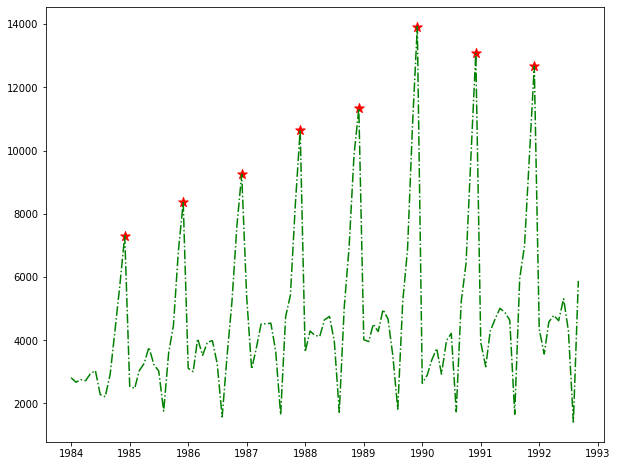

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(df_flagged.Month, df_flagged.Sales, color='g', linestyle='dashdot')
plt.scatter(df_flagged[df_flagged.flag == 1].Month, df_flagged[df_flagged.flag == 1].Sales, color='r', marker='*', s=100)
plt.show()

In [ ]:
df_flagged['t-1'] = df_flagged['Sales'].shift(1)
df_flagged['t-2'] = df_flagged['Sales'].shift(2)
df_flagged['t-3'] = df_flagged['Sales'].shift(3)
df_flagged['t-4'] = df_flagged['Sales'].shift(4)
df_flagged['t-5'] = df_flagged['Sales'].shift(5)
df_flagged['t-6'] = df_flagged['Sales'].shift(6)
df_flagged['t-7'] = df_flagged['Sales'].shift(7)
df_flagged['t-8'] = df_flagged['Sales'].shift(8)
df_flagged['t-9'] = df_flagged['Sales'].shift(9)
df_flagged

,Month,Sales,flag,t-1,t-2,t-3,t-4,t-5,t-6,t-7,t-8,t-9
0,1984-01-01,2815,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1984-02-01,2672,0,2815.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1984-03-01,2755,0,2672.0,2815.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1984-04-01,2721,0,2755.0,2672.0,2815.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1984-05-01,2946,0,2721.0,2755.0,2672.0,2815.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
100,1992-05-01,4618,0,4788.0,4577.0,3564.0,4348.0,12670.0,9851.0,6981.0,5951.0,1659.0
101,1992-06-01,5312,0,4618.0,4788.0,4577.0,3564.0,4348.0,12670.0,9851.0,6981.0,5951.0
102,1992-07-01,4298,0,5312.0,4618.0,4788.0,4577.0,3564.0,4348.0,12670.0,9851.0,6981.0
103,1992-08-01,1413,0,4298.0,5312.0,4618.0,4788.0,4577.0,3564.0,4348.0,12670.0,9851.0


In [ ]:
df_flagged.dropna(inplace=True)
df_flagged.reset_index(drop=True,inplace=True)
df_flagged.set_index('Month', inplace=True)
df_flagged

,Sales,flag,t-1,t-2,t-3,t-4,t-5,t-6,t-7,t-8,t-9
Month,,,,,,,,,,,
1984-10-01,4301,0,2922.0,2212.0,2282.0,3036.0,2946.0,2721.0,2755.0,2672.0,2815.0
1984-11-01,5764,0,4301.0,2922.0,2212.0,2282.0,3036.0,2946.0,2721.0,2755.0,2672.0
1984-12-01,7312,1,5764.0,4301.0,2922.0,2212.0,2282.0,3036.0,2946.0,2721.0,2755.0
1985-01-01,2541,0,7312.0,5764.0,4301.0,2922.0,2212.0,2282.0,3036.0,2946.0,2721.0
1985-02-01,2475,0,2541.0,7312.0,5764.0,4301.0,2922.0,2212.0,2282.0,3036.0,2946.0
...,...,...,...,...,...,...,...,...,...,...,...
1992-05-01,4618,0,4788.0,4577.0,3564.0,4348.0,12670.0,9851.0,6981.0,5951.0,1659.0
1992-06-01,5312,0,4618.0,4788.0,4577.0,3564.0,4348.0,12670.0,9851.0,6981.0,5951.0
1992-07-01,4298,0,5312.0,4618.0,4788.0,4577.0,3564.0,4348.0,12670.0,9851.0,6981.0


In [ ]:
X = df_flagged.drop(columns='flag')
y = df_flagged.flag

In [ ]:
X

,Sales,t-1,t-2,t-3,t-4,t-5,t-6,t-7,t-8,t-9
Month,,,,,,,,,,
1984-10-01,4301,2922.0,2212.0,2282.0,3036.0,2946.0,2721.0,2755.0,2672.0,2815.0
1984-11-01,5764,4301.0,2922.0,2212.0,2282.0,3036.0,2946.0,2721.0,2755.0,2672.0
1984-12-01,7312,5764.0,4301.0,2922.0,2212.0,2282.0,3036.0,2946.0,2721.0,2755.0
1985-01-01,2541,7312.0,5764.0,4301.0,2922.0,2212.0,2282.0,3036.0,2946.0,2721.0
1985-02-01,2475,2541.0,7312.0,5764.0,4301.0,2922.0,2212.0,2282.0,3036.0,2946.0
...,...,...,...,...,...,...,...,...,...,...
1992-05-01,4618,4788.0,4577.0,3564.0,4348.0,12670.0,9851.0,6981.0,5951.0,1659.0
1992-06-01,5312,4618.0,4788.0,4577.0,3564.0,4348.0,12670.0,9851.0,6981.0,5951.0
1992-07-01,4298,5312.0,4618.0,4788.0,4577.0,3564.0,4348.0,12670.0,9851.0,6981.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.10, random_state=0)

In [ ]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_train)
principalDF = pd.DataFrame(data=principal_components, columns=['pc1','pc2'])
y_train_indexless = y_train.reset_index(drop=True)
principalDF = pd.concat([principalDF,y_train_indexless], axis=1)
principalDF

,pc1,pc2,flag
0,6233.504253,-1958.747221,0
1,7980.934373,-363.673389,0
2,81.171631,-4654.384890,0
3,-2101.388121,3038.209612,0
4,-3097.937247,544.096124,0
...,...,...,...
81,-6137.776651,-1228.518397,0
82,-6336.424136,-888.345882,0
83,9514.370077,-1205.713831,0
84,-35.907673,-4067.320905,0


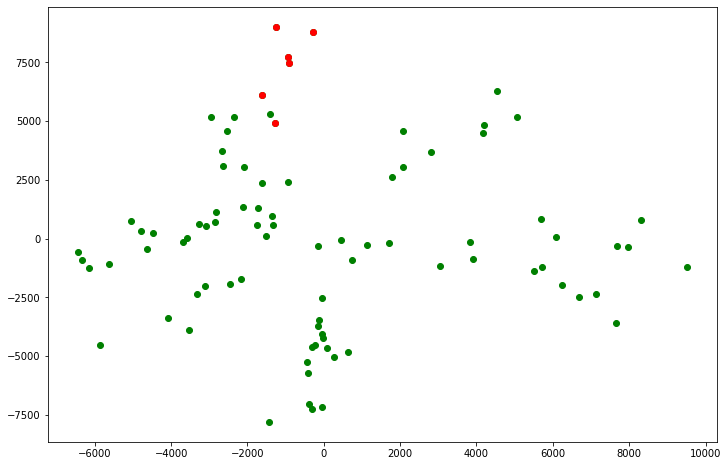

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(principalDF.pc1, principalDF.pc2, color='g')
plt.scatter(principalDF[principalDF.flag == 1].pc1, principalDF[principalDF.flag == 1].pc2, color='r')
plt.show()

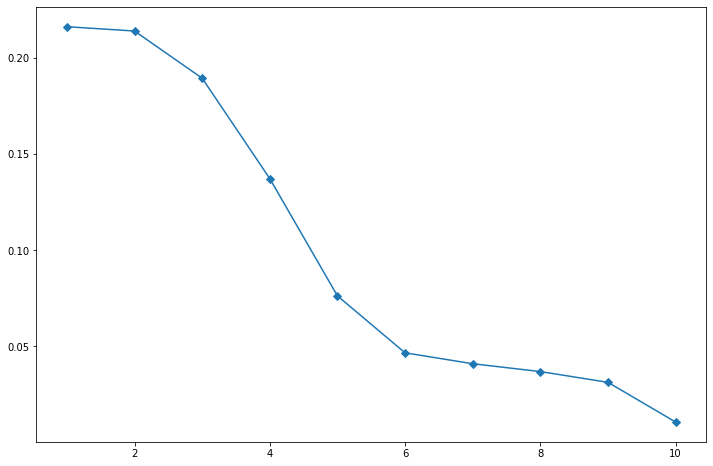

In [ ]:
pca = PCA()
pca_train = pca.fit_transform(X_train)
pca_train = pd.DataFrame(pca_train)
pca_test = pca.transform(X_test)
pca_test = pd.DataFrame(pca_test)
a = pca_train[range(0,len(pca_train.columns))]
b = ['pc' + str(i) for i in np.arange(1,len(a)+1)]
d = dict(zip(a, b))
pca_train = pca_train.rename(columns=d)    
pca_test = pca_test.rename(columns=d)
plt.figure(figsize=(12,8))
plt.plot(list(np.arange(1,pca_train.shape[1]+1)),pca.explained_variance_ratio_, "D-")
plt.show()

In [ ]:
pca.explained_variance_ratio_

array([0.21623351, 0.21397962, 0.1894546 , 0.13724396, 0.07631355,
       0.04669926, 0.04103717, 0.0369567 , 0.03135553, 0.0107261 ])

In [ ]:
pca_train
y_train_indexless = y_train.reset_index(drop=True)
pca_train = pd.concat([pca_train,y_train_indexless], axis=1)
pca_train

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,flag
0,6233.504253,-1958.747221,4785.777254,1527.485058,2486.071429,-1878.381002,2071.857261,936.857374,-561.028143,37.285937,0
1,7980.934373,-363.673389,-1672.937933,3770.709323,86.566059,3101.675369,-2876.109372,1163.377466,289.674097,-149.362225,0
2,81.171631,-4654.384890,-1944.736103,-6037.050349,4653.092518,673.552572,-3066.958867,-3141.825945,900.718002,1900.749628,0
3,-2101.388121,3038.209612,916.921281,-3881.413397,-1651.509435,292.737322,-325.975873,387.854394,-354.047342,-1074.522618,0
4,-3097.937247,544.096124,3960.069341,-1004.702097,-2474.515270,1793.953590,-443.560262,-765.671258,-859.376453,1020.578291,0
...,...,...,...,...,...,...,...,...,...,...,...
81,-6137.776651,-1228.518397,-473.590277,5681.719718,2336.791133,-2603.520051,-1869.921130,-2206.226388,-1742.819771,-1499.428778,0
82,-6336.424136,-888.345882,7042.893817,5795.151092,-648.373197,4382.746672,850.623086,-1743.114558,-944.329310,2183.063560,0
83,9514.370077,-1205.713831,-1501.557504,3473.984022,-218.573987,3491.404071,-3932.957622,642.642156,-1062.188951,-1162.014477,0
84,-35.907673,-4067.320905,-450.801919,-3448.973353,3170.764862,-278.985555,-2410.687361,-1214.443581,748.422214,706.083484,0


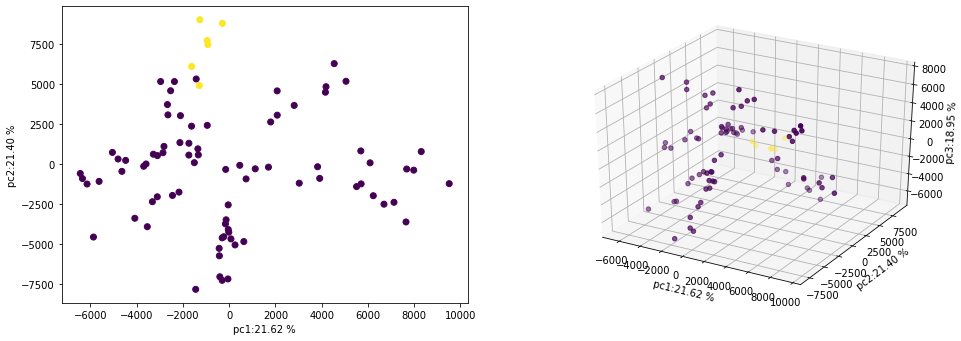

In [ ]:
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(2,2,1)
ax.scatter(pca_train["pc1"], pca_train["pc2"],c=pca_train.flag)
ax.set_xlabel("pc1:"+"{:.2f}".format(pca.explained_variance_ratio_[0]*100)+" %")
ax.set_ylabel("pc2:"+"{:.2f}".format(pca.explained_variance_ratio_[1]*100)+" %")

ax = fig.add_subplot(2,2,2, projection='3d')
ax.scatter(pca_train["pc1"], pca_train["pc2"], pca_train["pc3"],c=pca_train.flag)
ax.set_xlabel("pc1:"+"{:.2f}".format(pca.explained_variance_ratio_[0]*100)+" %")
ax.set_ylabel("pc2:"+"{:.2f}".format(pca.explained_variance_ratio_[1]*100)+" %")
ax.set_zlabel("pc3:"+"{:.2f}".format(pca.explained_variance_ratio_[2]*100)+" %")
    
plt.show()   

In [ ]:
X_train = principalDF.drop(columns='flag')
X_train

,pc1,pc2
0,6233.504253,-1958.747221
1,7980.934373,-363.673389
2,81.171631,-4654.384890
3,-2101.388121,3038.209612
4,-3097.937247,544.096124
...,...,...
81,-6137.776651,-1228.518397
82,-6336.424136,-888.345882
83,9514.370077,-1205.713831
84,-35.907673,-4067.320905


In [ ]:
X_test = pca_test[['pc1','pc2']]
X_test

,pc1,pc2
0,-1592.893744,5383.538201
1,-1368.074628,1981.852249
2,-911.019330,4209.710734
3,-4502.493130,647.925665
4,-8063.130934,-2320.515450
5,-4150.206446,-3022.444518
6,4671.063536,-55.945715
7,956.213965,-1029.885229
8,656.952558,-523.235687
9,236.525087,-1831.353213


In [ ]:
y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

In [ ]:
svc = SVC()
svc.fit(X_train,y_train)
#train_pred = svc.predict(X_train)
svc.score(X_train,y_train)

0.9767441860465116

In [ ]:
print(svc.predict(X_train))

[0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
print(y_train.values)
len(y_train)

[0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


86

In [ ]:
print(confusion_matrix(y_train, svc.predict(X_train)))

[[80  0]
 [ 2  4]]


In [ ]:
confusion_matrix(y_test, svc.predict(X_test))

array([[8, 0],
       [2, 0]])

In [ ]:
svc = SVC(kernel='rbf')
svc.fit(X_train,y_train)
train_pred = svc.predict(X_train)
print(f'Number of peak(s) detected for train: {sum(train_pred)}')
print(f'Mean accuracy for train:              {svc.score(X_train,y_train)}')
print(f'Confusion matrix for train: \n{confusion_matrix(y_train, svc.predict(X_train))}')
test_pred = svc.predict(X_test)
print(f'Number of peak(s) detected for test: {sum(test_pred)} ')
print(f'Mean accuracy for test:              {svc.score(X_test,y_test)}')
print(f'Confusion matrix for test: \n{confusion_matrix(y_test, svc.predict(X_test))}')

Number of peak(s) detected for train: 4
Mean accuracy for train:              0.9767441860465116
Confusion matrix for train: 
[[80  0]
 [ 2  4]]
Number of peak(s) detected for test: 0 
Mean accuracy for test:              0.8
Confusion matrix for test: 
[[8 0]
 [2 0]]


In [ ]:
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)
train_pred = svc.predict(X_train)
print(f'Number of peak(s) detected for train: {sum(train_pred)}')
print(f'Mean accuracy for train:              {svc.score(X_train,y_train)}')
print(f'Confusion matrix for train: \n{confusion_matrix(y_train, svc.predict(X_train))}')
test_pred = svc.predict(X_test)
print(f'Number of peak(s) detected for test: {sum(test_pred)} ')
print(f'Mean accuracy for test:              {svc.score(X_test,y_test)}')
print(f'Confusion matrix for test: \n{confusion_matrix(y_test, svc.predict(X_test))}')

Number of peak(s) detected for train: 6
Mean accuracy for train:              0.9767441860465116
Confusion matrix for train: 
[[79  1]
 [ 1  5]]
Number of peak(s) detected for test: 0 
Mean accuracy for test:              0.8
Confusion matrix for test: 
[[8 0]
 [2 0]]


In [ ]:
svc = SVC(kernel='poly')
svc.fit(X_train,y_train)
train_pred = svc.predict(X_train)
print(f'Number of peak(s) detected for train: {sum(train_pred)}')
print(f'Mean accuracy for train:              {svc.score(X_train,y_train)}')
print(f'Confusion matrix for train: \n{confusion_matrix(y_train, svc.predict(X_train))}')
test_pred = svc.predict(X_test)
print(f'Number of peak(s) detected for test: {sum(test_pred)} ')
print(f'Mean accuracy for test:              {svc.score(X_test,y_test)}')
print(f'Confusion matrix for test: \n{confusion_matrix(y_test, svc.predict(X_test))}')

Number of peak(s) detected for train: 4
Mean accuracy for train:              0.9767441860465116
Confusion matrix for train: 
[[80  0]
 [ 2  4]]
Number of peak(s) detected for test: 0 
Mean accuracy for test:              0.8
Confusion matrix for test: 
[[8 0]
 [2 0]]


In [ ]:
svc = SVC(kernel='sigmoid')
svc.fit(X_train,y_train)
train_pred = svc.predict(X_train)
print(f'Number of peak(s) detected for train: {sum(train_pred)}')
print(f'Mean accuracy for train:              {svc.score(X_train,y_train)}')
print(f'Confusion matrix for train: \n{confusion_matrix(y_train, svc.predict(X_train))}')
test_pred = svc.predict(X_test)
print(f'Number of peak(s) detected for test: {sum(test_pred)} ')
print(f'Mean accuracy for test:              {svc.score(X_test,y_test)}')
print(f'Confusion matrix for test: \n{confusion_matrix(y_test, svc.predict(X_test))}')

Number of peak(s) detected for train: 0
Mean accuracy for train:              0.9302325581395349
Confusion matrix for train: 
[[80  0]
 [ 6  0]]
Number of peak(s) detected for test: 0 
Mean accuracy for test:              0.8
Confusion matrix for test: 
[[8 0]
 [2 0]]


In [ ]:
for dgr in range(1,10):
  print(f'Polynomial degree: {dgr}')
  print('='*30)
  svc = SVC(kernel='poly', degree=dgr)
  svc.fit(X_train,y_train)
  train_pred = svc.predict(X_train)
  print(f'Number of peak(s) detected for train: {sum(train_pred)}')
  print(f'Mean accuracy for train:              {svc.score(X_train,y_train)}')
  print(f'Confusion matrix for train: \n{confusion_matrix(y_train, svc.predict(X_train))}')
  test_pred = svc.predict(X_test)
  print(f'Number of peak(s) detected for test: {sum(test_pred)} ')
  print(f'Mean accuracy for test:              {svc.score(X_test,y_test)}')
  print(f'Confusion matrix for test: \n{confusion_matrix(y_test, svc.predict(X_test))}')

Polynomial degree: 1
Number of peak(s) detected for train: 4
Mean accuracy for train:              0.9767441860465116
Confusion matrix for train: 
[[80  0]
 [ 2  4]]
Number of peak(s) detected for test: 0 
Mean accuracy for test:              0.8
Confusion matrix for test: 
[[8 0]
 [2 0]]
Polynomial degree: 2
Number of peak(s) detected for train: 3
Mean accuracy for train:              0.9651162790697675
Confusion matrix for train: 
[[80  0]
 [ 3  3]]
Number of peak(s) detected for test: 0 
Mean accuracy for test:              0.8
Confusion matrix for test: 
[[8 0]
 [2 0]]
Polynomial degree: 3
Number of peak(s) detected for train: 4
Mean accuracy for train:              0.9767441860465116
Confusion matrix for train: 
[[80  0]
 [ 2  4]]
Number of peak(s) detected for test: 0 
Mean accuracy for test:              0.8
Confusion matrix for test: 
[[8 0]
 [2 0]]
Polynomial degree: 4
Number of peak(s) detected for train: 4
Mean accuracy for train:              0.9767441860465116
Confusion ma

In [ ]:
svc = SVC(kernel='poly',degree=7,gamma='auto')
svc.fit(X_train,y_train)
train_pred = svc.predict(X_train)
print(f'Number of peak(s) detected for train: {sum(train_pred)}')
print(f'Mean accuracy for train:              {svc.score(X_train,y_train)}')
print(f'Confusion matrix for train: \n{confusion_matrix(y_train, svc.predict(X_train))}')
test_pred = svc.predict(X_test)
print(f'Number of peak(s) detected for test: {sum(test_pred)} ')
print(f'Mean accuracy for test:              {svc.score(X_test,y_test)}')
print(f'Confusion matrix for test: \n{confusion_matrix(y_test, svc.predict(X_test))}')

Number of peak(s) detected for train: 86
Mean accuracy for train:              0.06976744186046512
Confusion matrix for train: 
[[ 0 80]
 [ 0  6]]
Number of peak(s) detected for test: 10 
Mean accuracy for test:              0.2
Confusion matrix for test: 
[[0 8]
 [0 2]]


In [ ]:
svc = SVC(kernel='poly',degree=7,gamma='scale')
svc.fit(X_train,y_train)
train_pred = svc.predict(X_train)
print(f'Number of peak(s) detected for train: {sum(train_pred)}')
print(f'Mean accuracy for train:              {svc.score(X_train,y_train)}')
print(f'Confusion matrix for train: \n{confusion_matrix(y_train, svc.predict(X_train))}')
test_pred = svc.predict(X_test)
print(f'Number of peak(s) detected for test: {sum(test_pred)} ')
print(f'Mean accuracy for test:              {svc.score(X_test,y_test)}')
print(f'Confusion matrix for test: \n{confusion_matrix(y_test, svc.predict(X_test))}')

Number of peak(s) detected for train: 5
Mean accuracy for train:              0.9883720930232558
Confusion matrix for train: 
[[80  0]
 [ 1  5]]
Number of peak(s) detected for test: 0 
Mean accuracy for test:              0.8
Confusion matrix for test: 
[[8 0]
 [2 0]]


In [ ]:
svc = SVC(kernel='poly',degree=7,gamma='scale',C=10000)
svc.fit(X_train,y_train)
train_pred = svc.predict(X_train)
print(f'Number of peak(s) detected for train: {sum(train_pred)}')
print(f'Mean accuracy for train:              {svc.score(X_train,y_train)}')
print(f'Confusion matrix for train: \n{confusion_matrix(y_train, svc.predict(X_train))}')
test_pred = svc.predict(X_test)
print(f'Number of peak(s) detected for test: {sum(test_pred)} ')
print(f'Mean accuracy for test:              {svc.score(X_test,y_test)}')
print(f'Confusion matrix for test: \n{confusion_matrix(y_test, svc.predict(X_test))}')

Number of peak(s) detected for train: 5
Mean accuracy for train:              0.9883720930232558
Confusion matrix for train: 
[[80  0]
 [ 1  5]]
Number of peak(s) detected for test: 2 
Mean accuracy for test:              0.8
Confusion matrix for test: 
[[7 1]
 [1 1]]


In [ ]:
svc = SVC(kernel='poly',degree=7,gamma='scale',C=10000, coef0=0.5)
svc.fit(X_train,y_train)
train_pred = svc.predict(X_train)
print(f'Number of peak(s) detected for train: {sum(train_pred)}')
print(f'Mean accuracy for train:              {svc.score(X_train,y_train)}')
print(f'Confusion matrix for train: \n{confusion_matrix(y_train, svc.predict(X_train))}')
test_pred = svc.predict(X_test)
print(f'Number of peak(s) detected for test: {sum(test_pred)} ')
print(f'Mean accuracy for test:              {svc.score(X_test,y_test)}')
print(f'Confusion matrix for test: \n{confusion_matrix(y_test, svc.predict(X_test))}')

Number of peak(s) detected for train: 6
Mean accuracy for train:              1.0
Confusion matrix for train: 
[[80  0]
 [ 0  6]]
Number of peak(s) detected for test: 1 
Mean accuracy for test:              0.9
Confusion matrix for test: 
[[8 0]
 [1 1]]


In [ ]:
for coef in np.arange(0.05,1.01,0.05):
  print(f'\nCoef0: {coef}')
  print('='*55)
  svc = SVC(kernel='poly', degree=7, coef0=coef)
  svc.fit(X_train,y_train)
  train_pred = svc.predict(X_train)
  print(f'Number of peak(s) detected for train: {sum(train_pred)}')
  print(f'Mean accuracy for train:              {svc.score(X_train,y_train)}')
  print(f'Confusion matrix for train: \n{confusion_matrix(y_train, svc.predict(X_train))}')
  test_pred = svc.predict(X_test)
  print(f'Number of peak(s) detected for test: {sum(test_pred)} ')
  print(f'Mean accuracy for test:              {svc.score(X_test,y_test)}')
  print(f'Confusion matrix for test: \n{confusion_matrix(y_test, svc.predict(X_test))}')
  print('='*55)


Coef0: 0.05
Number of peak(s) detected for train: 5
Mean accuracy for train:              0.9883720930232558
Confusion matrix for train: 
[[80  0]
 [ 1  5]]
Number of peak(s) detected for test: 0 
Mean accuracy for test:              0.8
Confusion matrix for test: 
[[8 0]
 [2 0]]

Coef0: 0.1
Number of peak(s) detected for train: 5
Mean accuracy for train:              0.9883720930232558
Confusion matrix for train: 
[[80  0]
 [ 1  5]]
Number of peak(s) detected for test: 0 
Mean accuracy for test:              0.8
Confusion matrix for test: 
[[8 0]
 [2 0]]

Coef0: 0.15000000000000002
Number of peak(s) detected for train: 5
Mean accuracy for train:              0.9883720930232558
Confusion matrix for train: 
[[80  0]
 [ 1  5]]
Number of peak(s) detected for test: 0 
Mean accuracy for test:              0.8
Confusion matrix for test: 
[[8 0]
 [2 0]]

Coef0: 0.2
Number of peak(s) detected for train: 5
Mean accuracy for train:              0.9883720930232558
Confusion matrix for train: 
[[

In [ ]:
svc = SVC(kernel='poly',degree=7,gamma='scale', coef0=1)
svc.fit(X_train,y_train)
train_pred = svc.predict(X_train)
print(f'Number of peak(s) detected for train: {sum(train_pred)}')
print(f'Mean accuracy for train:              {svc.score(X_train,y_train)}')
print(f'Confusion matrix for train: \n{confusion_matrix(y_train, svc.predict(X_train))}')
test_pred = svc.predict(X_test)
print(f'Number of peak(s) detected for test: {sum(test_pred)} ')
print(f'Mean accuracy for test:              {svc.score(X_test,y_test)}')
print(f'Confusion matrix for test: \n{confusion_matrix(y_test, svc.predict(X_test))}')

Number of peak(s) detected for train: 6
Mean accuracy for train:              0.9767441860465116
Confusion matrix for train: 
[[79  1]
 [ 1  5]]
Number of peak(s) detected for test: 1 
Mean accuracy for test:              0.9
Confusion matrix for test: 
[[8 0]
 [1 1]]


In [ ]:
for coef in np.arange(0.05,1.01,0.05):
  print(f'\nCoef0: {coef}')
  print('='*55)
  svc = SVC(kernel='poly', degree=7, coef0=coef, C=10)
  svc.fit(X_train,y_train)
  train_pred = svc.predict(X_train)
  print(f'Number of peak(s) detected for train: {sum(train_pred)}')
  print(f'Mean accuracy for train:              {svc.score(X_train,y_train)}')
  print(f'Confusion matrix for train: \n{confusion_matrix(y_train, svc.predict(X_train))}')
  test_pred = svc.predict(X_test)
  print(f'Number of peak(s) detected for test: {sum(test_pred)} ')
  print(f'Mean accuracy for test:              {svc.score(X_test,y_test)}')
  print(f'Confusion matrix for test: \n{confusion_matrix(y_test, svc.predict(X_test))}')
  print('='*55)


Coef0: 0.05
Number of peak(s) detected for train: 5
Mean accuracy for train:              0.9883720930232558
Confusion matrix for train: 
[[80  0]
 [ 1  5]]
Number of peak(s) detected for test: 0 
Mean accuracy for test:              0.8
Confusion matrix for test: 
[[8 0]
 [2 0]]

Coef0: 0.1
Number of peak(s) detected for train: 5
Mean accuracy for train:              0.9883720930232558
Confusion matrix for train: 
[[80  0]
 [ 1  5]]
Number of peak(s) detected for test: 0 
Mean accuracy for test:              0.8
Confusion matrix for test: 
[[8 0]
 [2 0]]

Coef0: 0.15000000000000002
Number of peak(s) detected for train: 5
Mean accuracy for train:              0.9883720930232558
Confusion matrix for train: 
[[80  0]
 [ 1  5]]
Number of peak(s) detected for test: 0 
Mean accuracy for test:              0.8
Confusion matrix for test: 
[[8 0]
 [2 0]]

Coef0: 0.2
Number of peak(s) detected for train: 5
Mean accuracy for train:              0.9883720930232558
Confusion matrix for train: 
[[

In [ ]:
svc = SVC(kernel='poly',degree=7,gamma='scale', coef0=0.7, C=10)
svc.fit(X_train,y_train)
train_pred = svc.predict(X_train)
print(f'Number of peak(s) detected for train: {sum(train_pred)}')
print(f'Mean accuracy for train:              {svc.score(X_train,y_train)}')
print(f'Confusion matrix for train: \n{confusion_matrix(y_train, svc.predict(X_train))}')
test_pred = svc.predict(X_test)
print(f'Number of peak(s) detected for test: {sum(test_pred)} ')
print(f'Mean accuracy for test:              {svc.score(X_test,y_test)}')
print(f'Confusion matrix for test: \n{confusion_matrix(y_test, svc.predict(X_test))}')

Number of peak(s) detected for train: 7
Mean accuracy for train:              0.9883720930232558
Confusion matrix for train: 
[[79  1]
 [ 0  6]]
Number of peak(s) detected for test: 2 
Mean accuracy for test:              1.0
Confusion matrix for test: 
[[8 0]
 [0 2]]


In [ ]:
svc.support_vectors_

array([[-2361.09149536,  5166.50142799],
       [ 2078.72823052,  4583.43213756],
       [-1420.76011054,  5326.31020362],
       [ -942.78893308,  2433.13805558],
       [-1618.06526315,  6110.38345434],
       [-1289.15354673,  4917.80977199]])

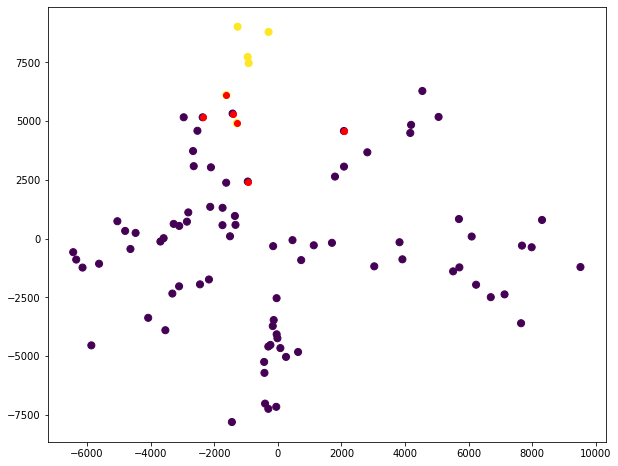

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, s=50)
plt.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1], c='r')

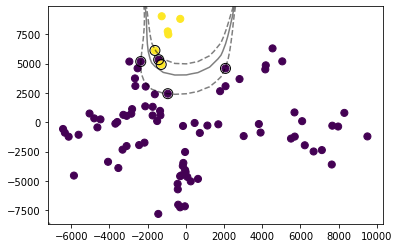

In [ ]:
ax = plt.gca()
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, s=50,)
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svc.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

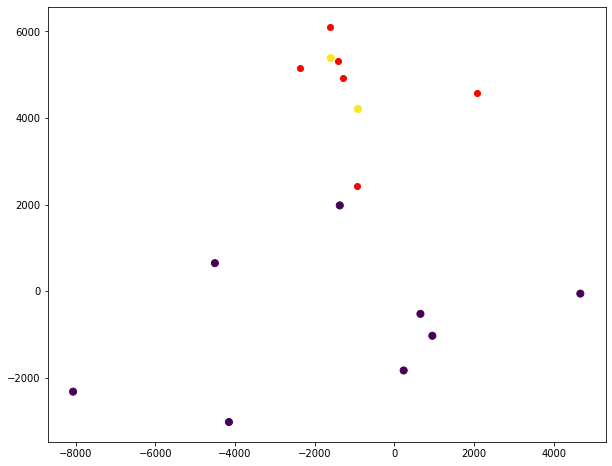

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, s=50)
plt.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1], c='r')

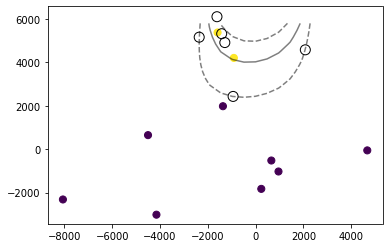

In [ ]:
ax = plt.gca()
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, s=50,)
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svc.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
X = X_train.append(X_test)
y = y_train.append(y_test)

In [ ]:
cv_results = cross_validate(svc, X, y, cv=8, n_jobs=-1, verbose=2)
scores = cv_results['test_score']
print(f'Mean accuracy on test set {scores.mean()}, with standard deviation {scores.std()}')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Mean accuracy on test set 0.96875, with standard deviation 0.057997545446146055


[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    1.3s finished
